# Impotant Modules

In [122]:
import warnings
from collections import namedtuple
from typing import Callable, Any, Optional, Tuple, List

import torch
import torch.nn.functional as F
from torch import nn
from torch import Tensor


In [123]:
import torchvision.models as models
import torchvision
import torch

In [124]:
import matplotlib.pyplot as plt
import numpy as np

In [125]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


In [126]:
import importlib.machinery
import os

from torch.hub import _get_torch_home

from torch.hub import load_state_dict_from_url  

In [127]:
from torchvision import utils

# **Inception Model:**

---



In [128]:
def inception_v3(pretrained: bool = False, progress: bool = True, **kwargs: Any):
    return Inception3(**kwargs)

class Inception3(nn.Module):

    def __init__(
        self,
        num_classes: int = 1000,
        aux_logits: bool = True,
        transform_input: bool = False,
    ) -> None:
        super(Inception3, self).__init__()
        self.transform_input = transform_input

        self.Conv3x3 = BasicConv2d(3, 200, kernel_size=3,stride=2)


    def _transform_input(self, x: Tensor) -> Tensor:
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        return x

    def _forward(self, x: Tensor) -> Tuple[Tensor, Optional[Tensor]]:
        # N x 3 x 299 x 299
        x = self.Conv3x3(x)
        print(x)
        return x
    def forward(self, x: Tensor):
        x = self._transform_input(x)
        x = self._forward(x)

        return x
        
         




class BasicConv2d(nn.Module):
      def __init__(
        self,
        in_channels: int,
        out_channels: int,
        **kwargs: Any
    ) -> None:
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, bias=False, **kwargs)
        self.bn = nn.BatchNorm2d(out_channels, eps=0.001)

      def forward(self, x: Tensor) -> Tensor:
      
        x = self.conv(x)
        x = self.bn(x)
        print('Output of Convolution 3*3')

        y = x[0][0].detach().numpy()
        plt.imshow(y)
        plt.show()
        return F.relu(x, inplace=True)


    






# Model Import

---



In [129]:
inception = inception_v3(pretrained=True)

# Output Model

In [130]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [131]:
from PIL import Image
input_image = Image.open(filename)

In [132]:
np.array(input_image).shape

(1213, 1546, 3)

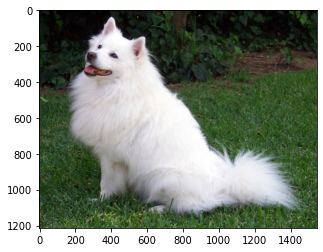

In [133]:
plt.imshow(input_image)

In [134]:

preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)

In [135]:

input_tensor.shape

torch.Size([3, 299, 299])

In [136]:
y = input_tensor.numpy().transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


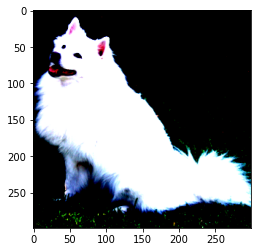

In [137]:
plt.imshow(y)

In [138]:
input_batch = input_tensor.unsqueeze(0) 

In [139]:
inception.eval()

Inception3(
  (Conv3x3): BasicConv2d(
    (conv): Conv2d(3, 200, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
)

Output of Convolution 3*3


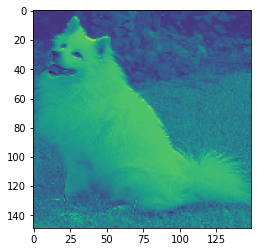

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [1.4092e-01, 3.1957e-01, 6.3734e-02,  ..., 9.5587e-02,
           0.0000e+00, 0.0000e+00],
          [1.0689e-01, 9.8185e-02, 9.6778e-02,  ..., 0.0000e+00,
           2.8209e-01, 4.9580e-02],
          [1.6297e-01, 0.0000e+00, 9.6131e-02,  ..., 3.1855e-02,
           1.6188e-01, 1.3893e-01]],

         [[1.4585e+00, 1.4700e+00, 1.4583e+00,  ..., 1.2335e+00,
           1.3835e+00, 1.3818e+00],
          [1.4418e+00, 1.4507e+00, 1.4740e+00,  ..., 1.1884e+00,
           1.4073e+00, 1.4582e+00],
          [1.4495e+00, 1.4273e+00, 1.4543e+00,  ..., 1.2691e+00,
           1.3493e+00, 1.4047e+00],
          ...,
          [4.6480e-01, 4.8641e-01, 8.8141e-01,  ..., 2.5099

In [140]:
output= inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

#Output  2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


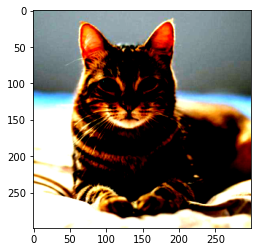

Output of Convolution 3*3


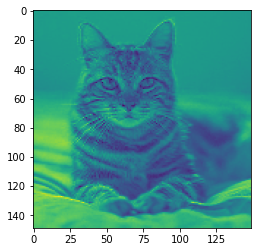

tensor([[[[0.1390, 0.1390, 0.1434,  ..., 0.1158, 0.1176, 0.1125],
          [0.1390, 0.1390, 0.1434,  ..., 0.1025, 0.1090, 0.1158],
          [0.1390, 0.1390, 0.1434,  ..., 0.1061, 0.1043, 0.1117],
          ...,
          [0.3653, 0.3603, 0.3572,  ..., 0.2542, 0.2602, 0.2728],
          [0.3592, 0.3459, 0.3538,  ..., 0.2550, 0.2676, 0.2794],
          [0.3453, 0.3447, 0.3408,  ..., 0.2681, 0.2754, 0.2758]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [141]:
import urllib
url, filename = ("https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg", "cat.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)

# Output 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


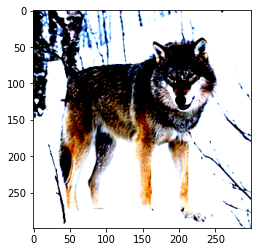

Output of Convolution 3*3


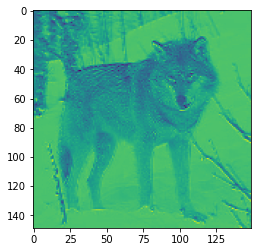

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.3867, 0.3877, 0.3877],
          [0.0000, 0.0000, 0.0000,  ..., 0.3867, 0.3877, 0.3877],
          [0.0000, 0.0000, 0.0000,  ..., 0.3867, 0.3877, 0.3877],
          ...,
          [0.3805, 0.3776, 0.3786,  ..., 0.3424, 0.2150, 0.3669],
          [0.3645, 0.3923, 0.3938,  ..., 0.3982, 0.3419, 0.2682],
          [0.4005, 0.3854, 0.3829,  ..., 0.3621, 0.4161, 0.2365]],

         [[0.7903, 0.8961, 0.7111,  ..., 0.0000, 0.0000, 0.0000],
          [0.9859, 0.7481, 0.7201,  ..., 0.0000, 0.0000, 0.0000],
          [0.8986, 0.8129, 0.6314,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1906, 0.1437, 0.1824,  ..., 0.0000, 0.0000, 0.0000],
          [0.1614, 0.0889, 0.0947,  ..., 0.0000, 0.0000, 0.0000],
          [0.1896, 0.2075, 0.1615,  ..., 0

In [142]:
import urllib
url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Eurasian_wolf_2.jpg/330px-Eurasian_wolf_2.jpg", "wolf.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
y = input_tensor.numpy().transpose(1,2,0)
plt.imshow(y)
plt.show()
input_batch = input_tensor.unsqueeze(0) 
output = inception(input_batch)
output_prob = torch.nn.Softmax(dim=1)
output_class = output_prob(output)
print(output_class)